# Регуляризация в машинном обучении

Регуляризация - это метод, который добавляет некоторую форму измерения (например, штраф) к функции потерь, чтобы предотвратить переобучение. Это делается путем добавления штрафа к сложности модели, что приводит к уменьшению или упрощению коэффициентов для некоторых переменных, что может привести к уменьшению влияния переменных на модель.

В контексте линейной регрессии регуляризация может применяться для штрафования больших коэффициентов, чтобы модель стала более устойчивой и менее склонной к переобучению.

## Ridge Regression (L2 регуляризация)

Ridge Regression, также известная как L2 регуляризация, добавляет штраф к квадрату магнитуды коэффициентов. Функция потерь в Ridge Regression выглядит следующим образом:

L(θ) = MSE(θ) + α * Σ(θ^2)

где:
- L(θ) - функция потерь с регуляризацией
- MSE(θ) - среднеквадратичная ошибка
- α - параметр регуляризации (если α = 0, Ridge Regression эквивалентна линейной регрессии; если α очень большое, все веса приближаются к нулю, и результат становится горизонтальной линией, проходящей через среднее значение данных)
- θ - вектор параметров модели

Основное преимущество Ridge Regression заключается в том, что она может предотвратить переобучение, особенно когда модель имеет множество признаков.

## Lasso Regression (L1 регуляризация)

Lasso Regression, или L1 регуляризация, добавляет штраф к абсолютному значению магнитуды коэффициентов. Функция потерь в Lasso Regression выглядит следующим образом:

L(θ) = MSE(θ) + α * Σ|θ|

где:
- L(θ) - функция потерь с регуляризацией
- MSE(θ) - среднеквадратичная ошибка
- α - параметр регуляризации
- θ - вектор параметров модели

Одним из основных отличий Lasso Regression от Ridge Regression является то, что Lasso может привести к тому, что некоторые коэффициенты станут равными нулю. Это означает, что Lasso может служить методом выбора признаков и выводить более простую и интерпретируемую модель.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Загрузка набора данных Boston Housing
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

# Разделение данных на обучающую и тестовую выборки
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data.head()

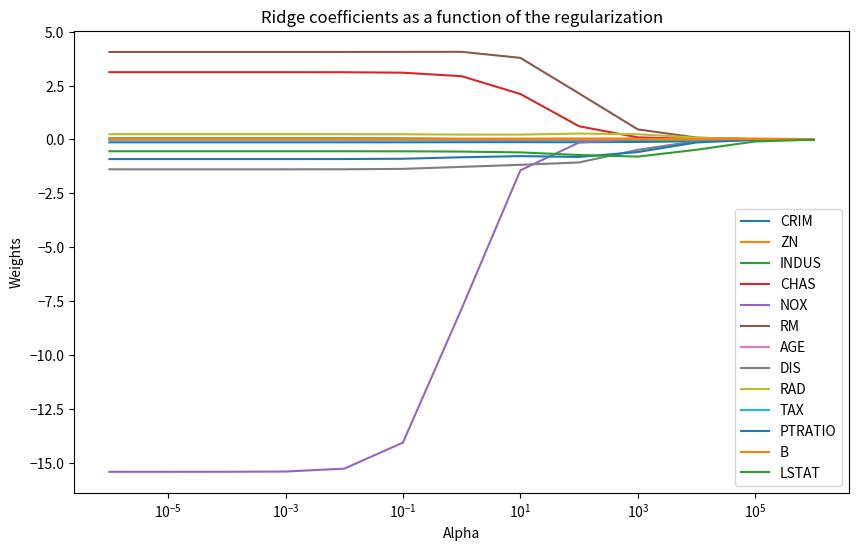

In [ ]:
# Обучение модели Ridge регрессии с различными значениями α
alphas = np.logspace(-6, 6, 13)
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Визуализация коэффициентов в зависимости от α
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X.columns)
plt.show()

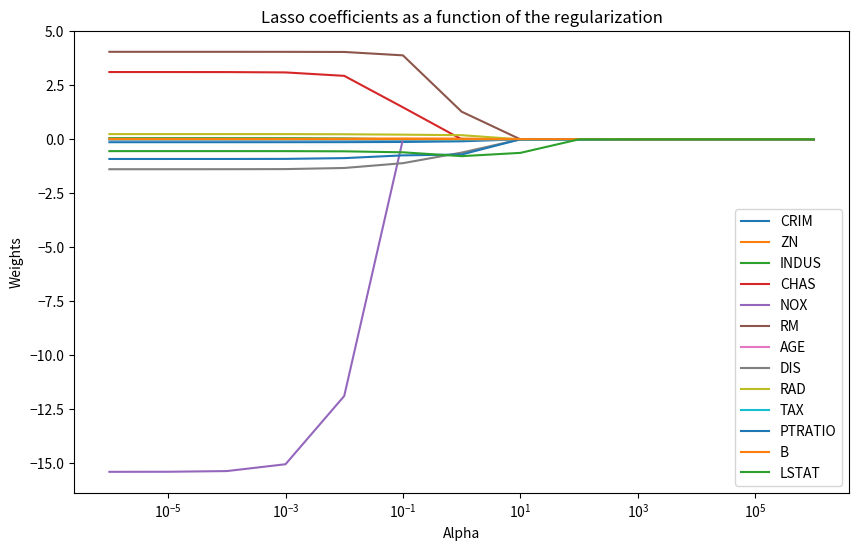

In [ ]:
# Обучение модели Lasso регрессии с различными значениями α
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Визуализация коэффициентов в зависимости от α
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X.columns)
plt.show()

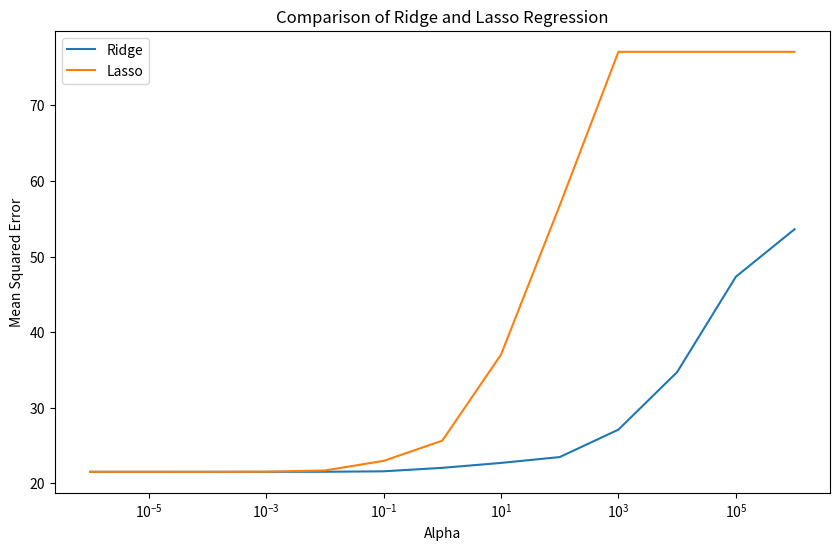

In [ ]:
# Сравнение качества моделей на тестовой выборке
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    ridge_pred = ridge.predict(X_test)
    lasso_pred = lasso.predict(X_test)

    ridge_mse.append(mean_squared_error(y_test, ridge_pred))
    lasso_mse.append(mean_squared_error(y_test, lasso_pred))

# Визуализация ошибок моделей в зависимости от α
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, ridge_mse, label='Ridge')
ax.plot(alphas, lasso_mse, label='Lasso')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Ridge and Lasso Regression')
plt.legend()
plt.show()